# Import the Libraries

In [1]:
#Import the required  libraries for Logistic Regression
# !pip install ppscore
import pandas as pd
# !pip install pandas==1.3.5
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold
import ppscore as ps  
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=200

In [2]:
#Importing the training and testing data
TrainingData=pd.read_csv("https://raw.githubusercontent.com/priyankamoree/Machine-Learning-Models-/main/Dataset/Titanic_train.csv")
TestingData=pd.read_csv("https://raw.githubusercontent.com/priyankamoree/Machine-Learning-Models-/main/Dataset/Titanic_test.csv")

In [3]:
#To know how much of the data we have 
len(TrainingData),len(TestingData)

(891, 418)

In [4]:
TrainingData,TestingData

(     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [5]:
df = pd.concat([TrainingData, TestingData], axis=0, ignore_index=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
df.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#For Discreptive Statistics 
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


# Exploratory Data Analysis

In [9]:
df.drop('Survived',axis=1,inplace=True)
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [10]:
#Dropping the unnececcary columns which will not affect our data base even if they won't be present 
df.drop(columns=['Name','PassengerId','Ticket','Embarked','Fare','SibSp','Parch'],inplace=True)

In [11]:
#Checking if our data has missing values or not
df.isnull().sum()

Pclass       0
Sex          0
Age        263
Cabin     1014
dtype: int64

In [12]:
#For checking the Percentage of the missing values for each column 
for i in df.columns:
    print(f'Percentage of missing values in {i} column: {df[i].isna().sum()/len(df[i])*100}')

Percentage of missing values in Pclass column: 0.0
Percentage of missing values in Sex column: 0.0
Percentage of missing values in Age column: 20.091673032849503
Percentage of missing values in Cabin column: 77.46371275783041


In [13]:
#handle the missing values 
df['Age'].fillna(df['Age'].median(),inplace=True)

#Dropping cabin column because it has more than 50% of missing value 
df.drop(columns=['Cabin'],inplace=True)  

In [14]:
df.isna().sum()

Pclass    0
Sex       0
Age       0
dtype: int64

In [15]:
#Categorical Columns needs to be converted into numerical columns for Model Building so we performing One Hot Encoding
df= pd.get_dummies(df,columns=['Sex'],dtype=int)

In [16]:
df

,Pclass,Age,Sex_female,Sex_male
0,3,22.0,0,1
1,1,38.0,1,0
2,3,26.0,1,0
3,1,35.0,1,0
4,3,35.0,0,1
...,...,...,...,...
1304,3,28.0,0,1
1305,1,39.0,1,0
1306,3,38.5,0,1
1307,3,28.0,0,1


In [17]:
df.dtypes

Pclass          int64
Age           float64
Sex_female      int32
Sex_male        int32
dtype: object

# Data Visualization

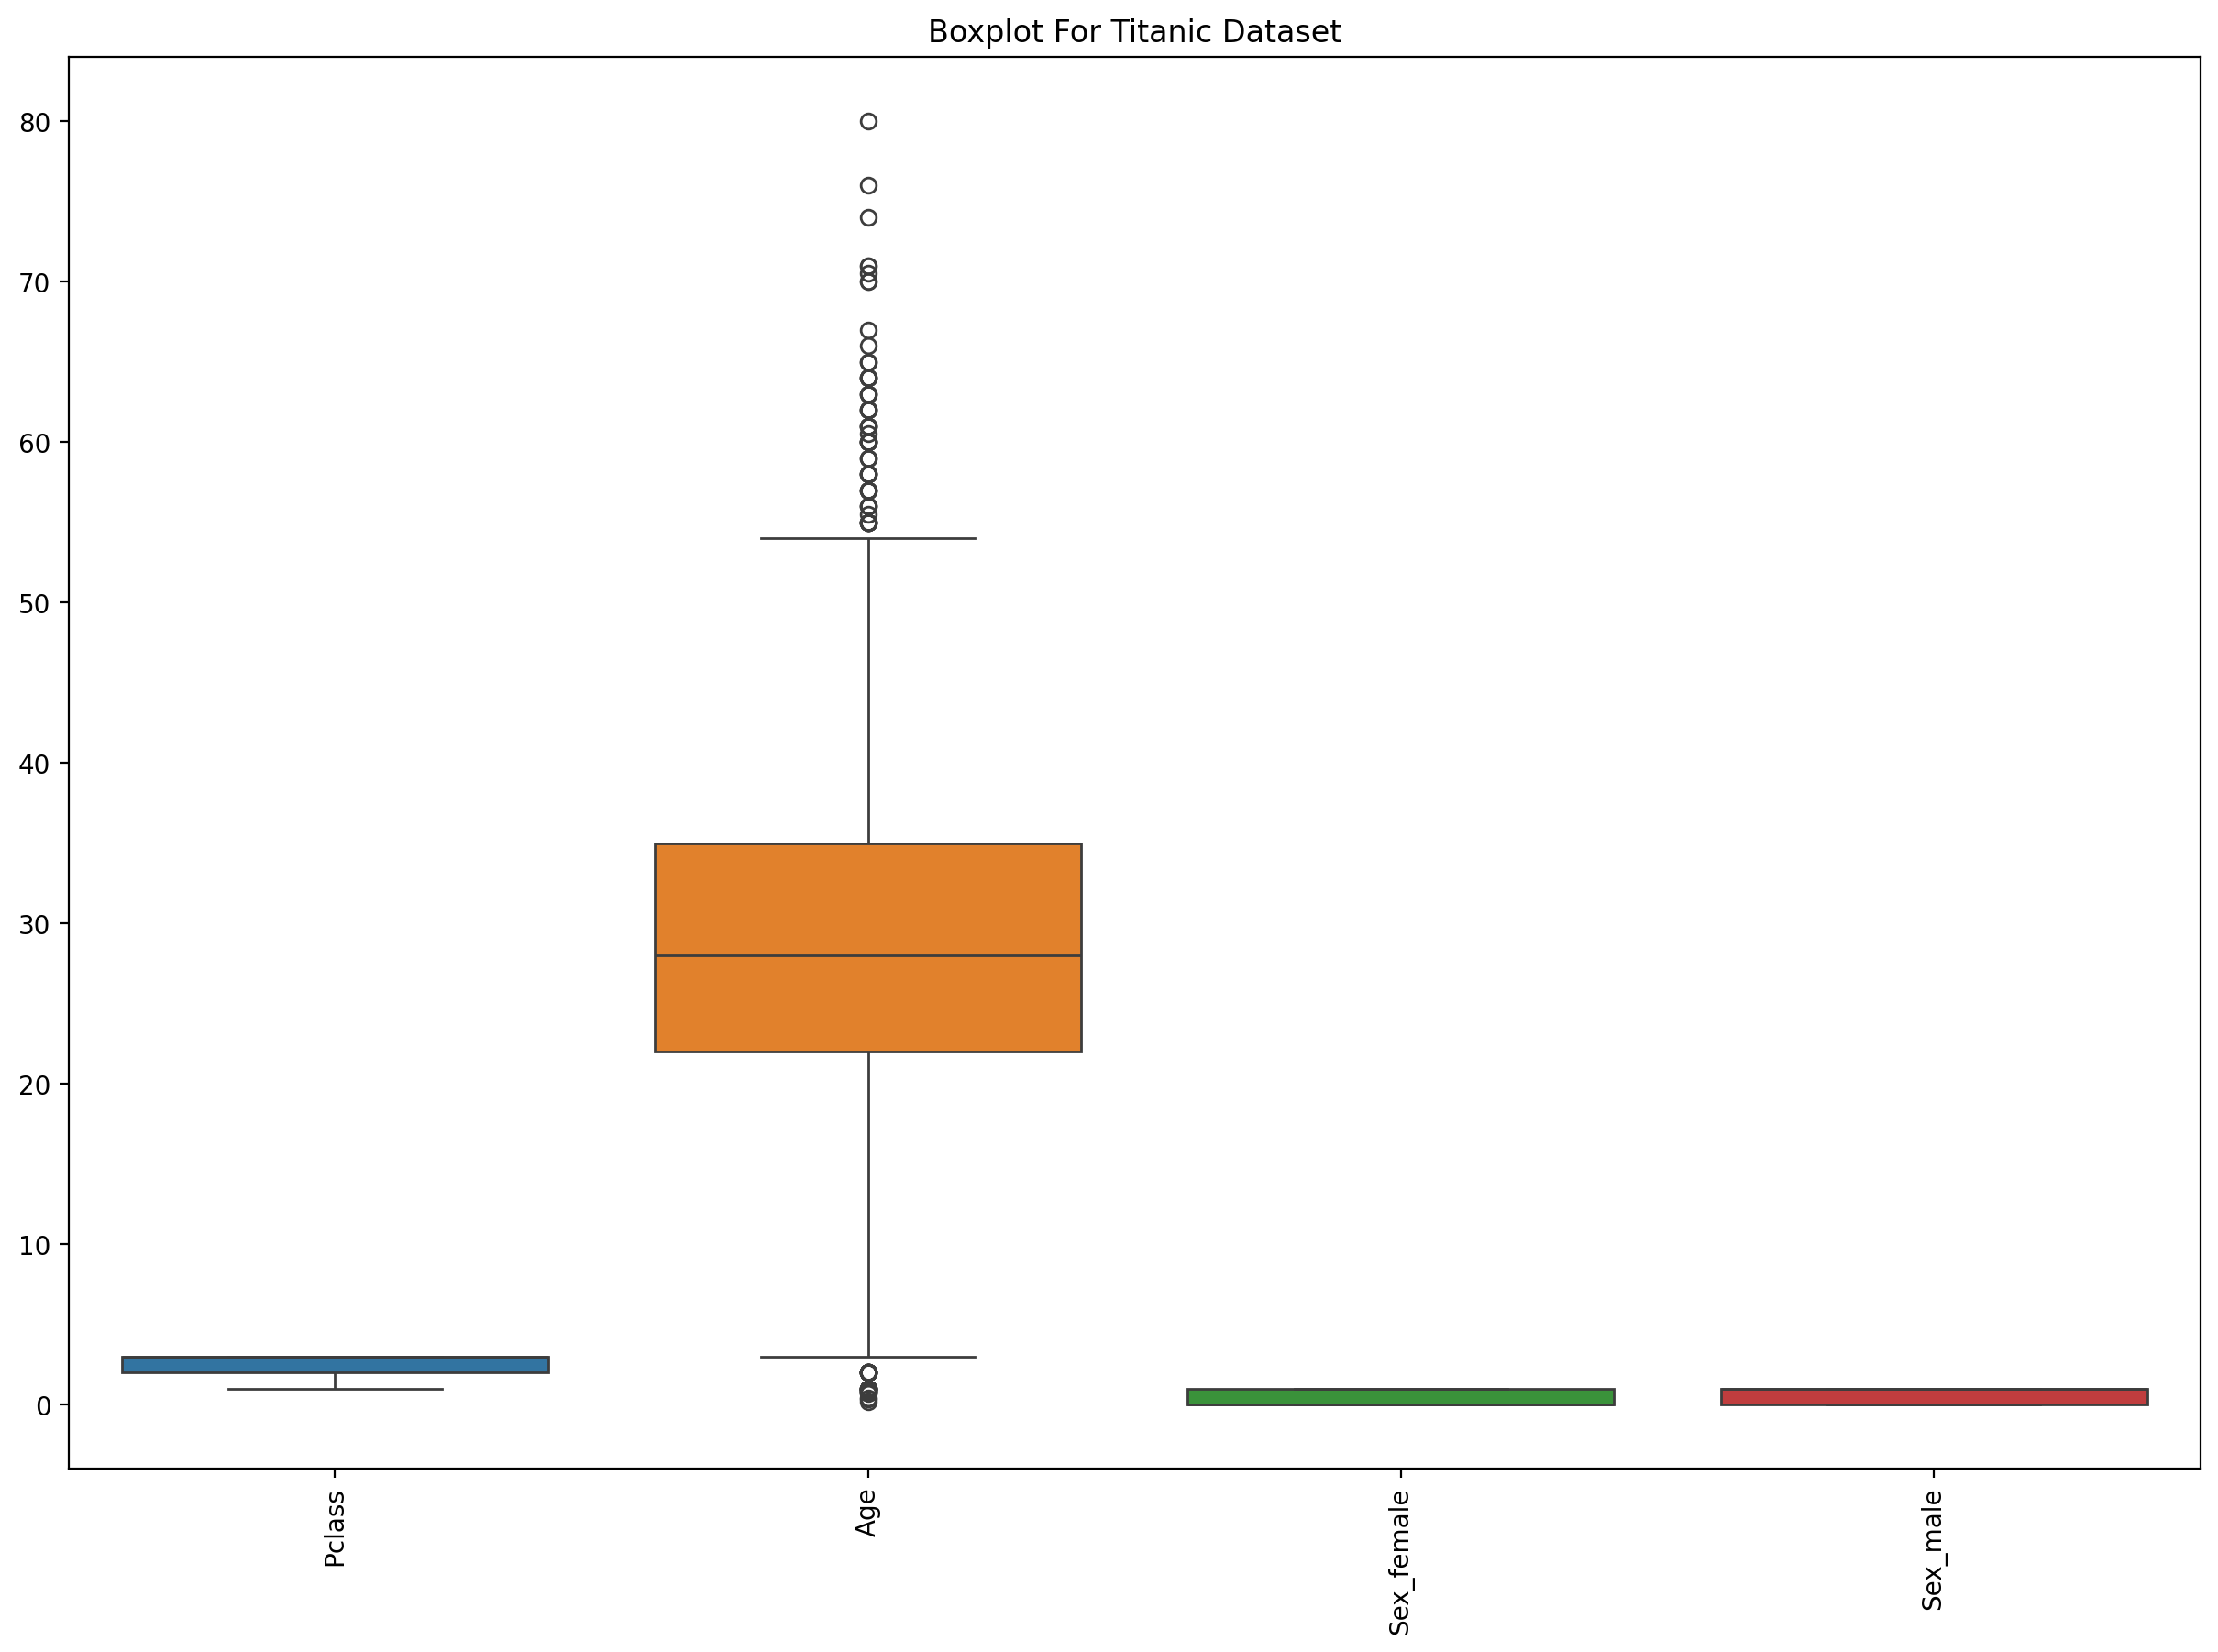

In [18]:
#Boxplot For Visualizing The Outliers in Titanic Dataset
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot For Titanic Dataset")
plt.show()

In [19]:
def Outlier_Detection(data,columns):
    for col in columns:
        q1=data[col].quantile(0.25)
        q3=data[col].quantile(0.75)
        iqr=q3-q1
        lower=q1-(1.5*iqr)
        upper=q3+(1.5*iqr)
        data[col]=np.where(data[col]>upper,upper,np.where(data[col]<lower,lower,data[col]))

In [20]:
Outlier_Detection(df,df.columns)

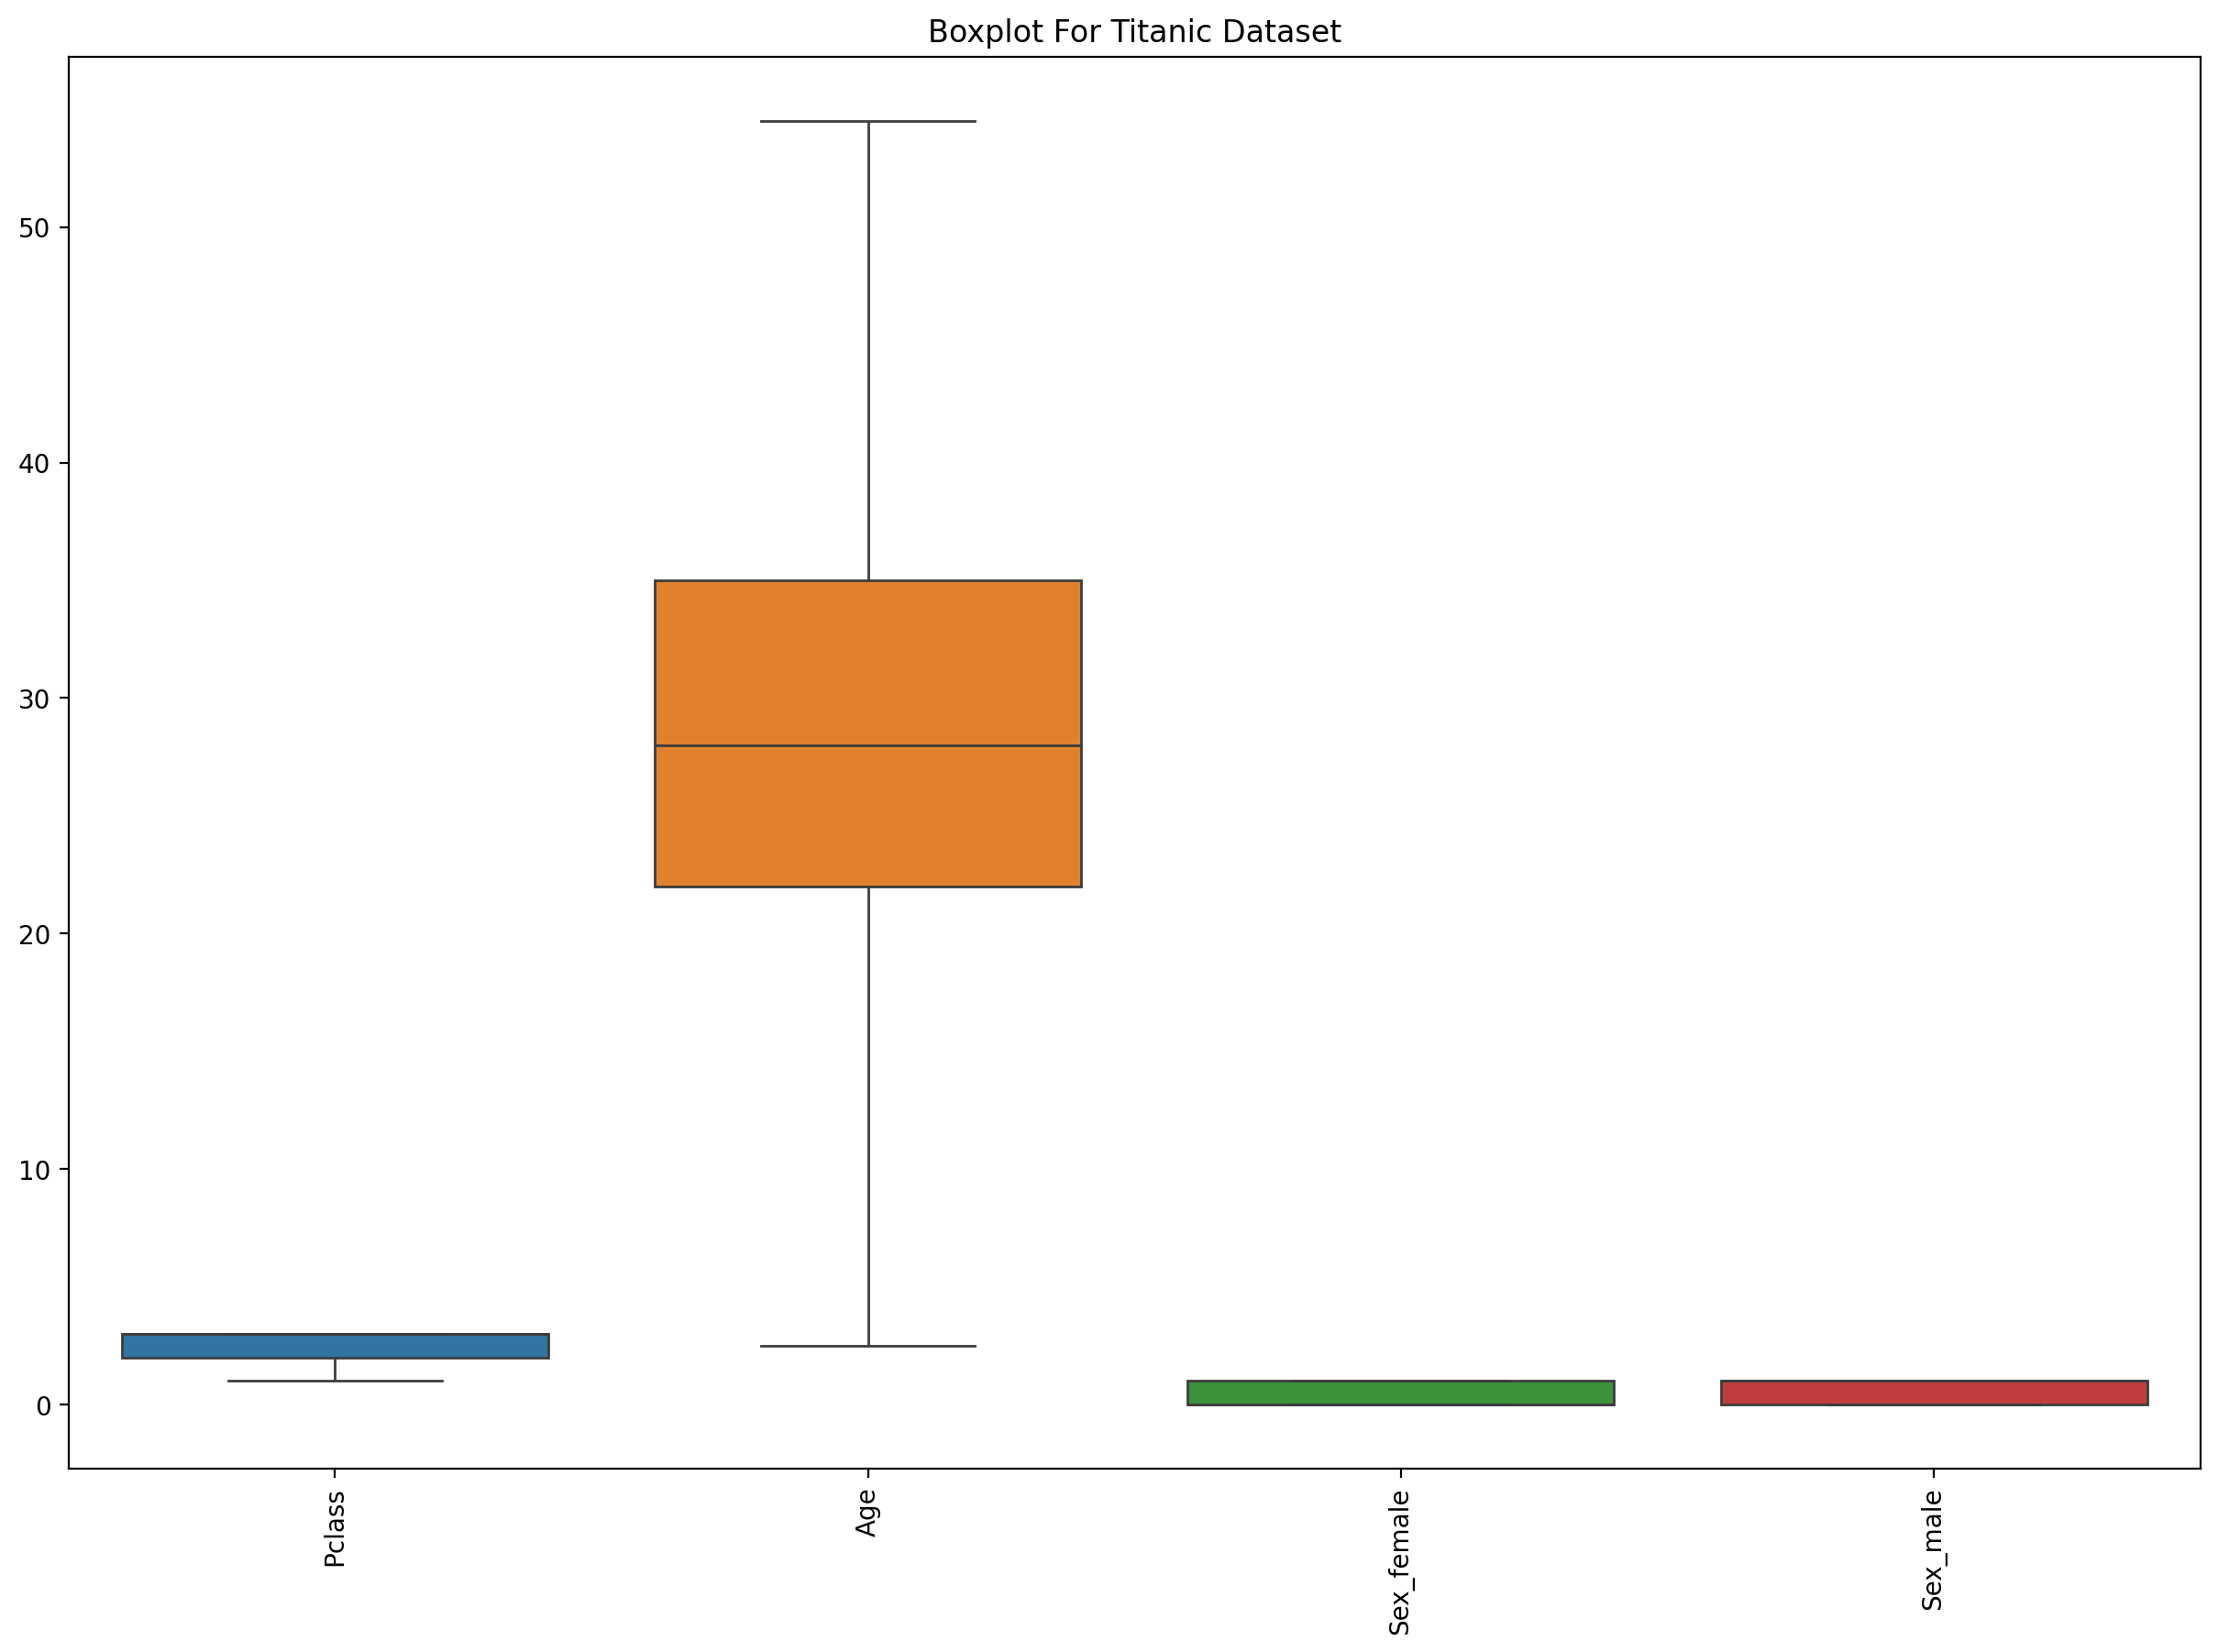

In [21]:
#Boxplot For Visualizing The Outliers in Titanic Dataset after Dealing with the outliers 
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot For Titanic Dataset")
plt.show()

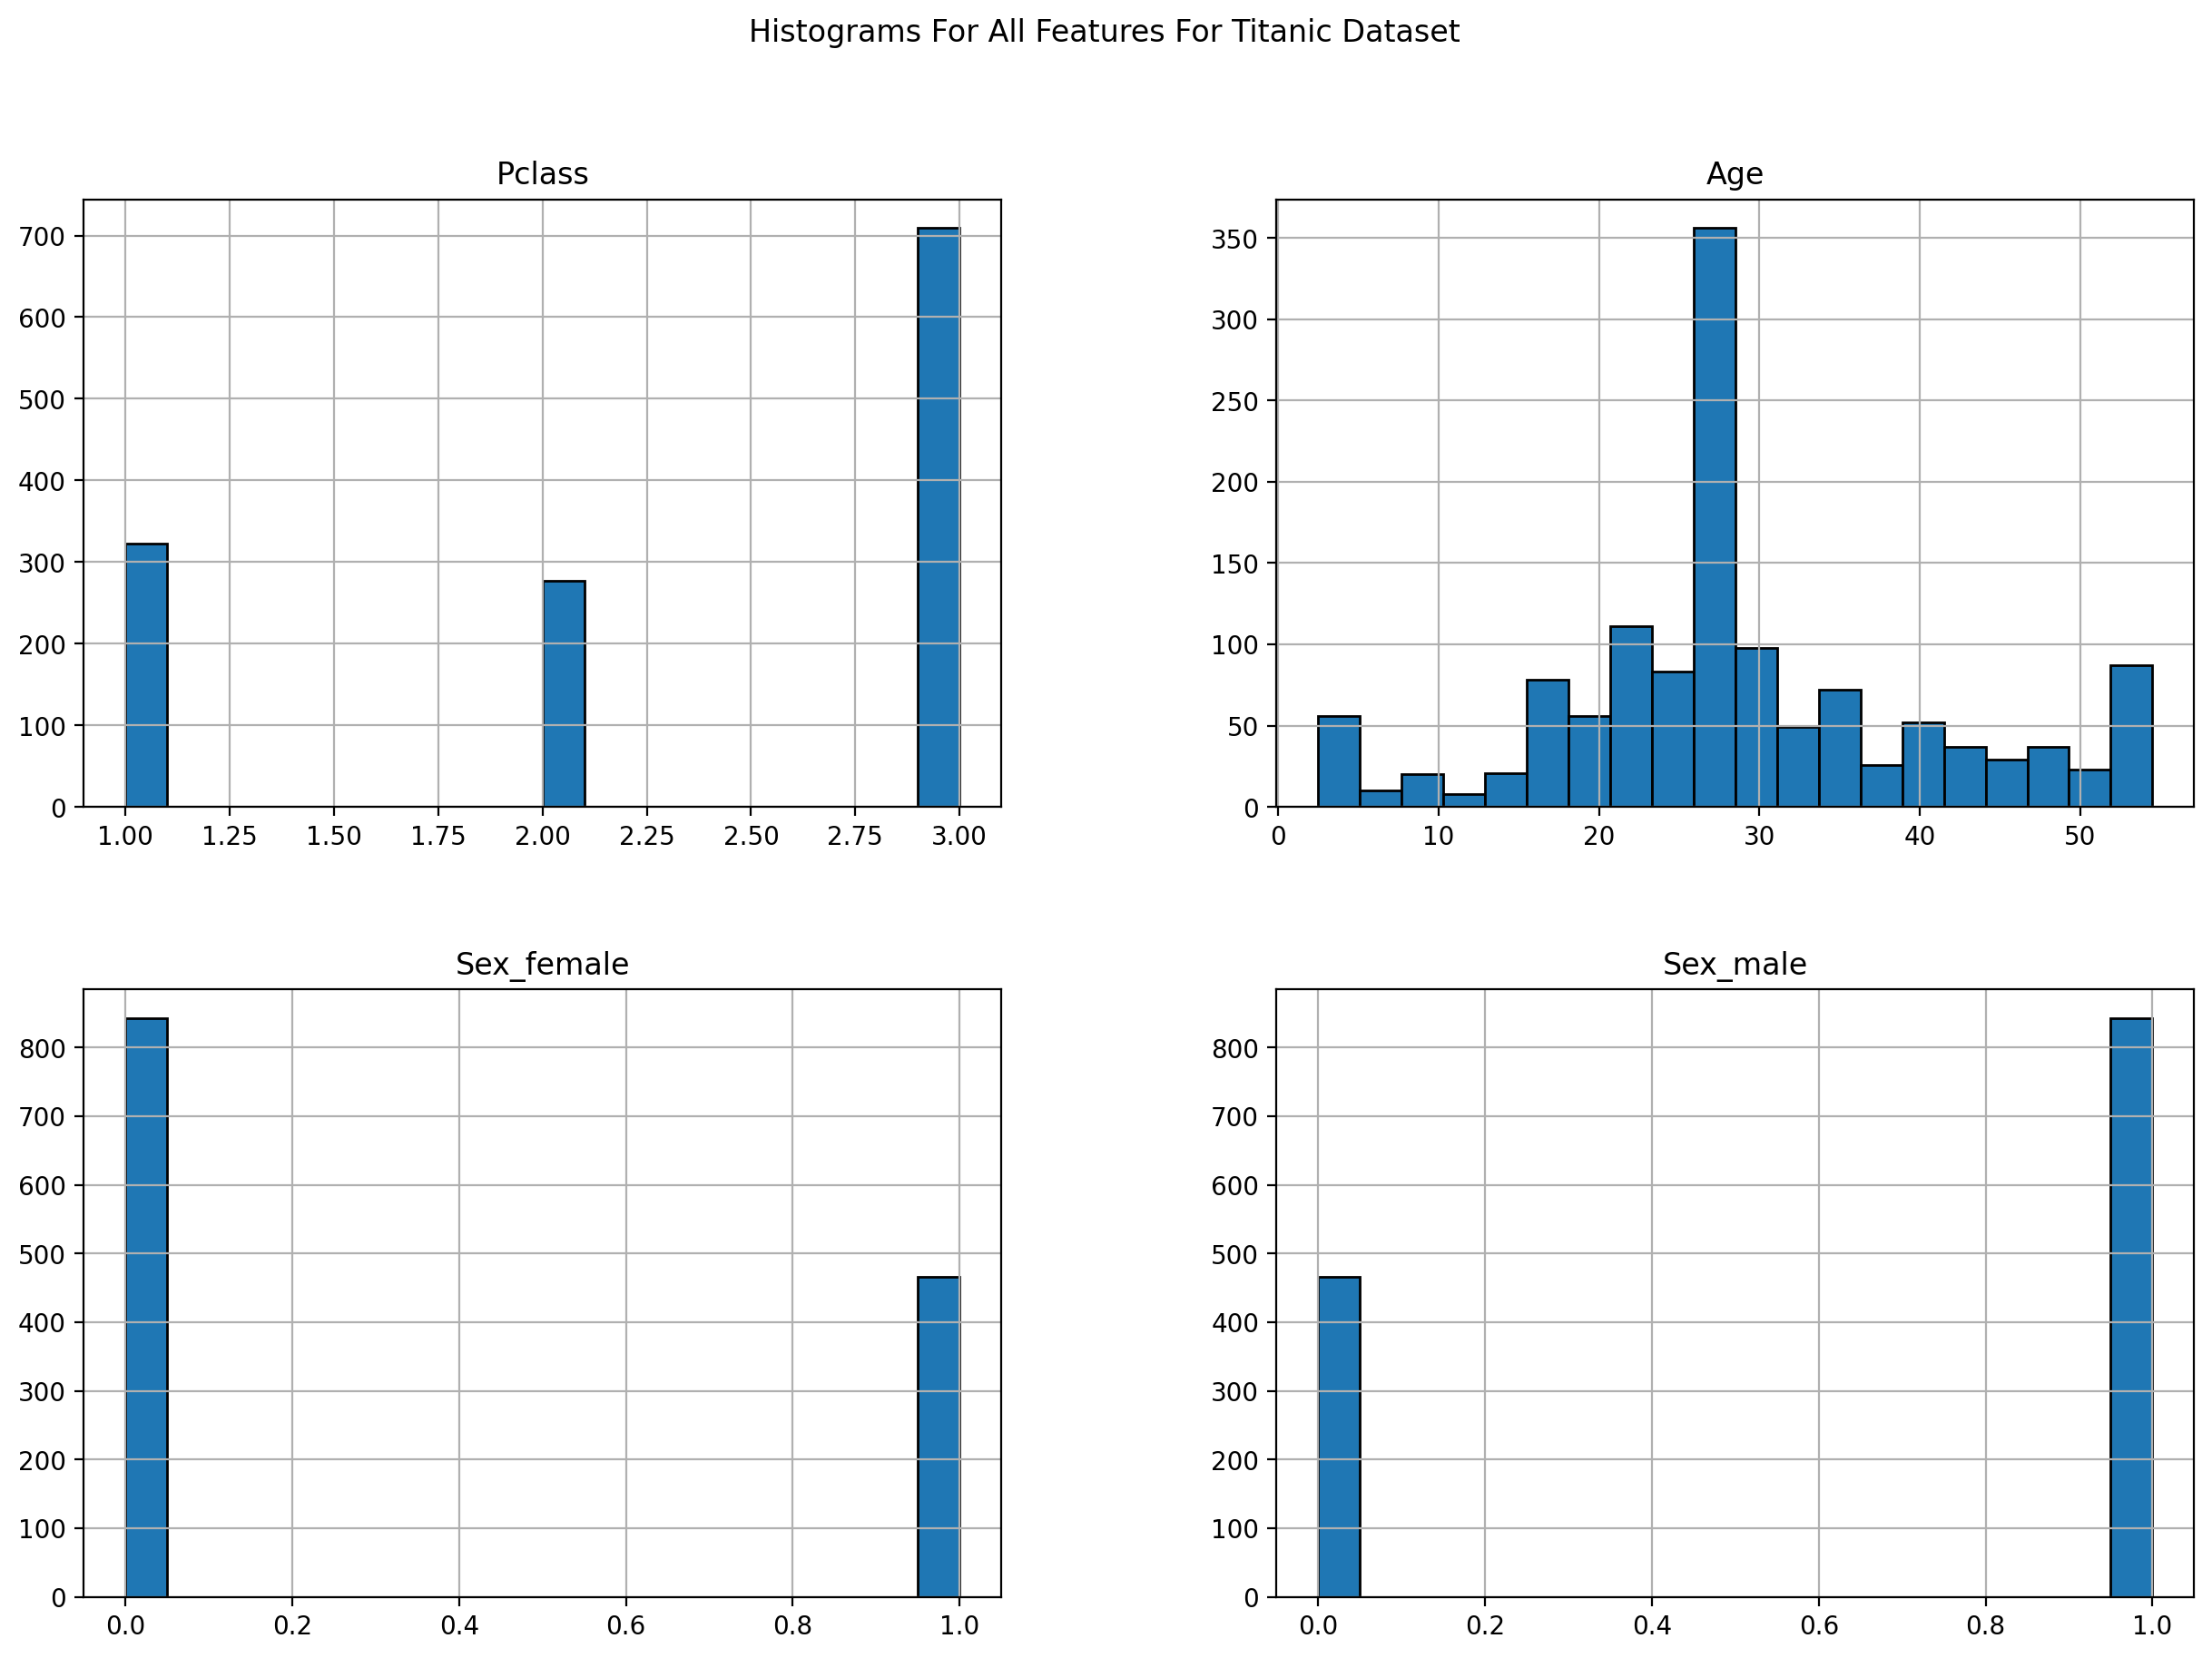

In [22]:
#Historgram For all the features
df.hist(bins=20, figsize=(15,10), edgecolor='black')
plt.suptitle("Histograms For All Features For Titanic Dataset")
plt.show()

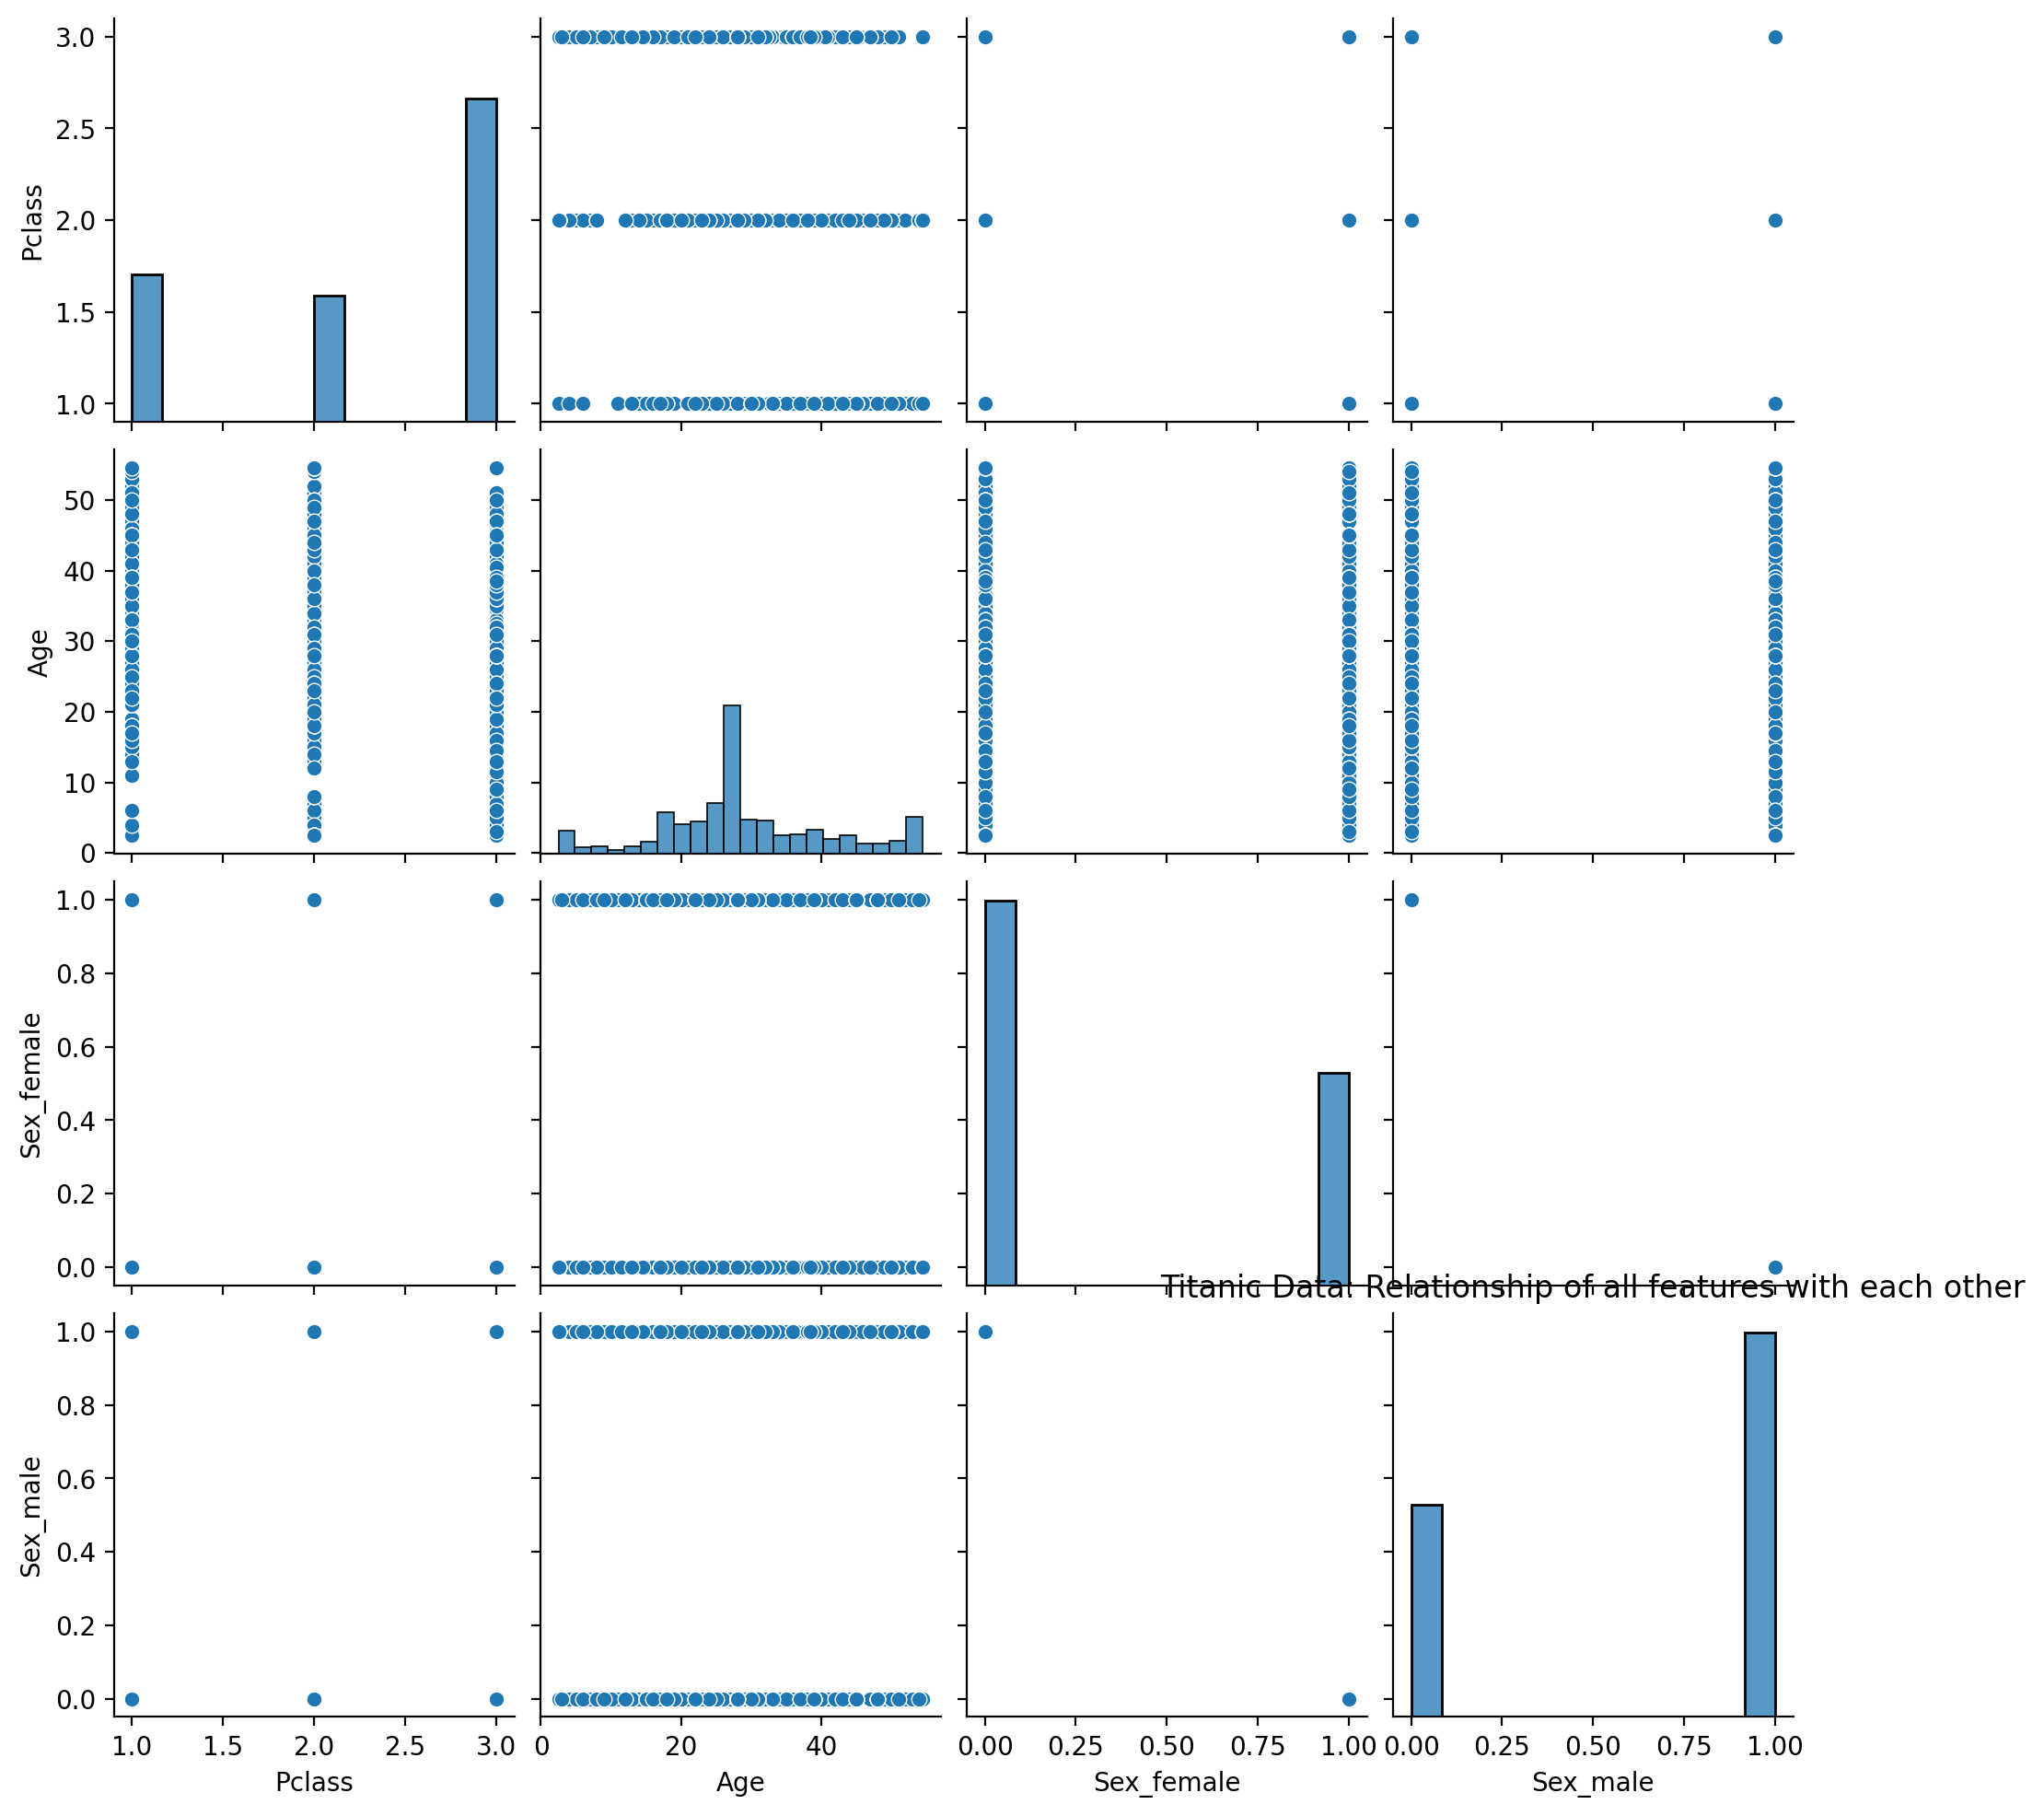

In [23]:
#Pairplot to visualize all the relationships between the features of Titanic Dataset
sns.pairplot(df)
plt.title("Titanic Data: Relationship of all features with each other")
plt.show()

In [24]:
df.corr()

,Pclass,Age,Sex_female,Sex_male
Pclass,1.000000,-0.378527,-0.124617,0.124617
Age,-0.378527,1.000000,-0.051779,0.051779
Sex_female,-0.124617,-0.051779,1.000000,-1.000000
Sex_male,0.124617,0.051779,-1.000000,1.000000


In [25]:
print(sns.__version__)

0.13.2


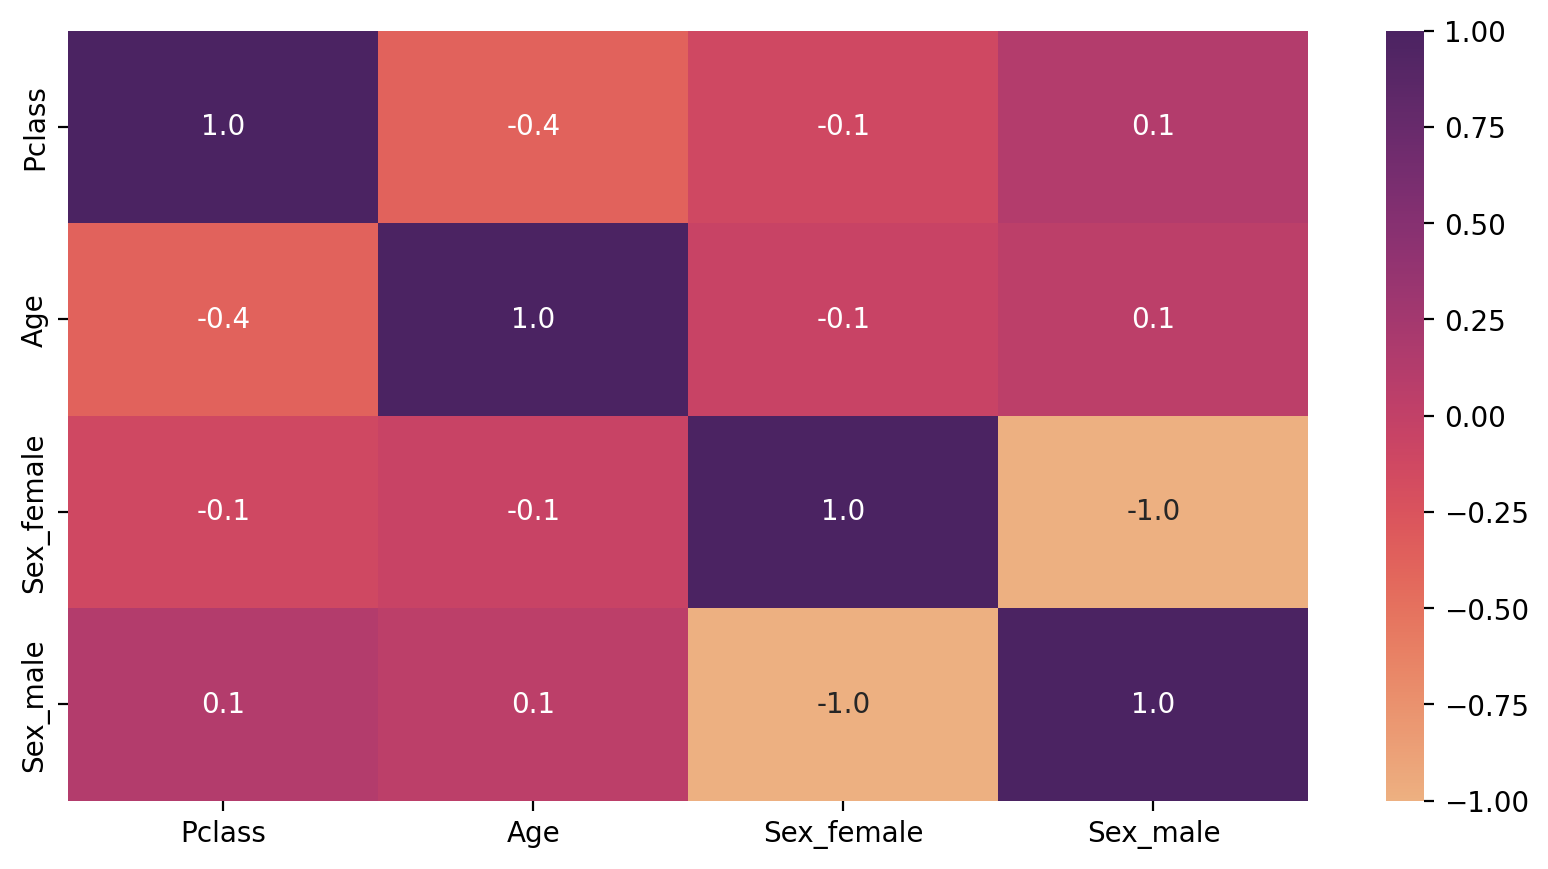

<Figure size 2000x1000 with 0 Axes>

In [26]:
#Heatmap For better understanding of the relationships between the feature of Titanic Dataset 
sns.heatmap(df.corr(), cbar=True, cmap='flare',annot=True, fmt='.1f',center=0)
plt.figure(figsize=(10,5))
plt.show()

In [27]:
#Standardizing the values to increase the accuracy
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(df)
df

,Pclass,Age,Sex_female,Sex_male
0,3.0,22.0,0.0,1.0
1,1.0,38.0,1.0,0.0
2,3.0,26.0,1.0,0.0
3,1.0,35.0,1.0,0.0
4,3.0,35.0,0.0,1.0
...,...,...,...,...
1304,3.0,28.0,0.0,1.0
1305,1.0,39.0,1.0,0.0
1306,3.0,38.5,0.0,1.0
1307,3.0,28.0,0.0,1.0


# Model Building

In [28]:
#First Lets split the combined data again into training and testing data 
train_new=df.iloc[:len(TrainingData)]
test_new=df.iloc[len(TrainingData):len(TrainingData)+len(TestingData)]

In [29]:
#spliting the concatenated data again into training and testing data 
train_new['Survived'] = TrainingData['Survived']
train_new,test_new

(     Pclass   Age  Sex_female  Sex_male  Survived
 0       3.0  22.0         0.0       1.0         0
 1       1.0  38.0         1.0       0.0         1
 2       3.0  26.0         1.0       0.0         1
 3       1.0  35.0         1.0       0.0         1
 4       3.0  35.0         0.0       1.0         0
 ..      ...   ...         ...       ...       ...
 886     2.0  27.0         0.0       1.0         0
 887     1.0  19.0         1.0       0.0         1
 888     3.0  28.0         1.0       0.0         0
 889     1.0  26.0         0.0       1.0         1
 890     3.0  32.0         0.0       1.0         0
 
 [891 rows x 5 columns],
       Pclass   Age  Sex_female  Sex_male
 891      3.0  34.5         0.0       1.0
 892      3.0  47.0         1.0       0.0
 893      2.0  54.5         0.0       1.0
 894      3.0  27.0         0.0       1.0
 895      3.0  22.0         1.0       0.0
 ...      ...   ...         ...       ...
 1304     3.0  28.0         0.0       1.0
 1305     1.0  39.0      

In [30]:
#spliting the data into Dependent and independent variable 
x_train=train_new.iloc[:,:4]
y_train=train_new['Survived']
x_test = test_new

In [31]:
X_col = x_train.columns
Y_col = ['Survived']

In [32]:
#Printing the train and test data 
x_train,x_test,y_train

(     Pclass   Age  Sex_female  Sex_male
 0       3.0  22.0         0.0       1.0
 1       1.0  38.0         1.0       0.0
 2       3.0  26.0         1.0       0.0
 3       1.0  35.0         1.0       0.0
 4       3.0  35.0         0.0       1.0
 ..      ...   ...         ...       ...
 886     2.0  27.0         0.0       1.0
 887     1.0  19.0         1.0       0.0
 888     3.0  28.0         1.0       0.0
 889     1.0  26.0         0.0       1.0
 890     3.0  32.0         0.0       1.0
 
 [891 rows x 4 columns],
       Pclass   Age  Sex_female  Sex_male
 891      3.0  34.5         0.0       1.0
 892      3.0  47.0         1.0       0.0
 893      2.0  54.5         0.0       1.0
 894      3.0  27.0         0.0       1.0
 895      3.0  22.0         1.0       0.0
 ...      ...   ...         ...       ...
 1304     3.0  28.0         0.0       1.0
 1305     1.0  39.0         1.0       0.0
 1306     3.0  38.5         0.0       1.0
 1307     3.0  28.0         0.0       1.0
 1308     3.0  28.0

In [33]:
#Logistic Model
model = LogisticRegression()
model.fit(x_train,y_train)
ypred = model.predict(x_test)
ypred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Accuracy 

In [34]:
#Accuracy 
print(f"Training Accuracy = {model.score(x_train,y_train)}")

Training Accuracy = 0.8002244668911336


In [35]:
#since we don't have the actual testing data's Y values given we are just predicting the score with given test data  
print(f"Predicted Accuracy = {model.score(x_test,ypred)}")

Predicted Accuracy = 1.0
